In [1]:
# Import Libraries

import pandas as pd
import  matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_46cfbb2be49b4e55aaddfddf599b9e70 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_46cfbb2be49b4e55aaddfddf599b9e70 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_46cfbb2be49b4e55aaddfddf599b9e70 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tYnOxLxbGrJdii_epWj5Y6WAb5XCGOc8rv4sEGh0S8ks',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_46cfbb2be49b4e55aaddfddf599b9e70)

body = client_46cfbb2be49b4e55aaddfddf599b9e70.get_object(Bucket='dataanalysiswithpython-donotdelete-pr-defh1lq5yqdzrf',Key='movies.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [9]:
df = df_data_1
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [12]:
# Checking for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [62]:
missing_data = df.isnull()
missing_data.head()

name  rating  genre   year  released  score  votes  director  writer  \
0  False   False  False  False     False  False  False     False   False   
1  False   False  False  False     False  False  False     False   False   
2  False   False  False  False     False  False  False     False   False   
3  False   False  False  False     False  False  False     False   False   
4  False   False  False  False     False  False  False     False   False   

    star  country  budget  gross  company  runtime  
0  False    False   False  False    False    False  
1  False    False   False  False    False    False  
2  False    False   False  False    False    False  
3  False    False   False  False    False    False  
4  False    False   False  False    False    False

In [21]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

name
False    5497
Name: name, dtype: int64

rating
False    5477
True       20
Name: rating, dtype: int64

genre
False    5497
Name: genre, dtype: int64

year
False    5497
Name: year, dtype: int64

released
False    5497
Name: released, dtype: int64

score
False    5494
True        3
Name: score, dtype: int64

votes
False    5494
True        3
Name: votes, dtype: int64

director
False    5497
Name: director, dtype: int64

writer
False    5497
Name: writer, dtype: int64

star
False    5496
True        1
Name: star, dtype: int64

country
False    5496
True        1
Name: country, dtype: int64

budget
False    5497
Name: budget, dtype: int64

gross
False    5436
True       61
Name: gross, dtype: int64

company
False    5491
True        6
Name: company, dtype: int64

runtime
False    5495
True        2
Name: runtime, dtype: int64



In [ ]:
df.dropna(subset=["runtime","company","gross",], axis=0, inplace=True)

In [23]:
df.dropna()

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [25]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7661                                Love by Drowning      R      Drama  2020   
7662                                   The Robinsons    NaN     Action  2020   
7663                                    More to Life    NaN      Drama  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   

                               released  score      votes           director  \
0         June 13, 1980 (United States)    8.4   927000.0    Stanley Kubrick   
1          July 2, 1980 (United States)    5.8    65000.0     Randal Kleiser   
2         June 20, 1980 (United States)    8.7  1200000.0     Irvin Kershner   
3          July 2, 1980 (United States)    7.7   221000.0       Jim Abrahams   
4         July 25, 1980 (United States)    7.3   108000.0       Harold Ramis   
...                                 ...    ...        ...                ...   
7661   November 6, 2020 (United States)    NaN        NaN  Justin Kreinbrink   
7662  November 10, 2020 (United States)    NaN        NaN          Directors   
7663   October 23, 2020 (United States)    3.1       18.0      Joseph Ebanks   
7665          April 27, 2020 (Cameroon)    5.7       29.0       Nkanya Nkwai   
7666    October 1, 2020 (United States)    NaN        NaN      James Randall   

                       writer            star         country      budget  \
0                Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2              Leigh Brackett     Mark Hamill   United States  18000000.0   
3                Jim Abrahams     Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray     Chevy Chase   United States   6000000.0   
...                       ...             ...             ...         ...   
7661            C.E. Poverman    Nicky Whelan   United States   1000000.0   
7662     Aleks Alifirenko Jr.  Billy Hartmann   United States     10000.0   
7663            Joseph Ebanks    Shannon Bond   United States      7000.0   
7665             Lynno Lovert    Onyama Laura   United States     58750.0   
7666            James Randall   Christina Roz   United States     15000.0   

            gross             company  runtime  
0      46998772.0        Warner Bros.    146.0  
1      58853106.0   Columbia Pictures    104.0  
2     538375067.0           Lucasfilm    124.0  
3      83453539.0  Paramount Pictures     88.0  
4      39846344.0      Orion Pictures     98.0  
...           ...                 ...      ...  
7661          NaN      Dow Jazz Films    121.0  
7662          NaN                 NaN     90.0  
7663          NaN                 NaN     90.0  
7665          NaN    Embi Productions      NaN  
7666          NaN                 NaN    120.0  

[5497 rows x 15 columns]

In [63]:
df1=df.dropna()
df1.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

In [29]:
# Data types for the columns

df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
df = df1

In [64]:
#Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

/tmp/wsuser/ipykernel_154/2460906768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
/tmp/wsuser/ipykernel_154/2460906768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')


name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

In [66]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime yearcorrect  
0   699       46  19000000   46998772     1426    146.0        1304  
1   214       47   4500000   58853106      452    104.0        1127  
2  1157       47  18000000  538375067      945    124.0        1359  
3  1474       47   3500000   83453539     1108     88.0        1127  
4   271       47   6000000   39846344     1083     98.0        1170

In [39]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [38]:
pd.set_option('display.max_rows', None)

In [41]:
#Drop any duplicates

df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [43]:
df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

<AxesSubplot:xlabel='budget', ylabel='gross'>

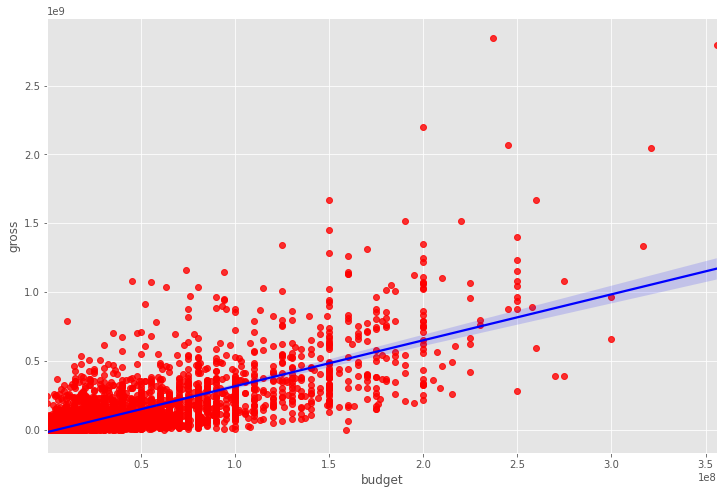

In [48]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [49]:
df.corr(method='pearson')  #pearson, kendall,spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

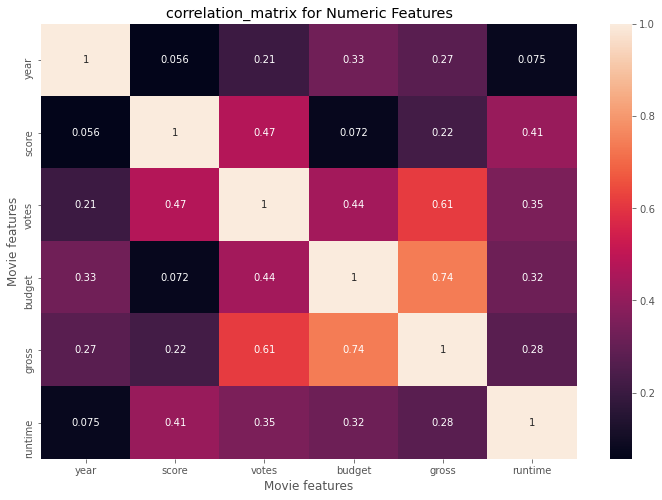

In [51]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation_matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [52]:
# Looking at company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [67]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

/tmp/wsuser/ipykernel_154/2794092863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerized[col_name] = df_numerized[col_name].astype('category')
/tmp/wsuser/ipykernel_154/2794092863.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerized[col_name] = df_numerized[col_name].cat.codes


name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0          341  
1   214       47   4500000   58853106      452    104.0          144  
2  1157       47  18000000  538375067      945    124.0          401  
3  1474       47   3500000   83453539     1108     88.0          144  
4   271       47   6000000   39846344     1083     98.0          192

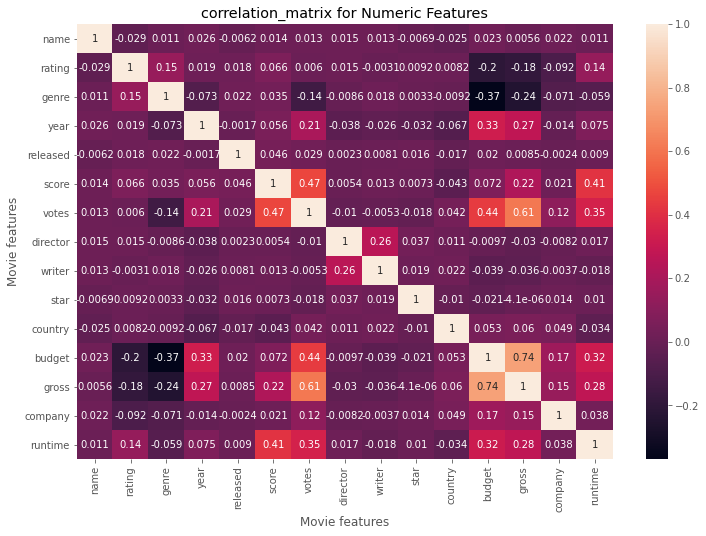

In [55]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation_matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [56]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating   -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre     0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year      0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score     0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes     0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director  0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer    0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star     -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget    0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross     0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company   0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime   0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   

             votes  director    writer      star   country    budget  \
name      0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating    0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre    -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year      0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score     0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes     1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer   -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star     -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country   0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget    0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross     0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company   0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime   0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   

             gross   company   runtime  
name      0.005639  0.021697  0.010850  
rating   -0.181906 -0.092357  0.140792  
genre    -0.244101 -0.071334 -0.059237  
year      0.274321 -0.014333  0.075077  
released  0.008501 -0.002407  0.008975  
score     0.222556  0.020656  0.414068  
votes     0.614751  0.118470  0.352303  
director -0.029560 -0.008223  0.017433  
writer   -0.035885 -0.003697 -0.017561  
star     -0.000004  0.014082  0.010108  
country   0.060078  0.048569 -0.034477  
budget    0.740247  0.170235  0.318695  
gross     1.000000  0.149553  0.275796  
company   0.149553  1.000000  0.037585  
runtime   0.275796  0.037585  1.000000

In [57]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [58]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [59]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [60]:
# Votes and Budget have the highest correlation to gross earnings